Two geometry point of view of vectors:
- Points in the plane
- Directions in the plane

In [1]:
%matplotlib inline
import torch
import torchvision
from IPython import display
from torchvision import transforms
from d2l import torch as d2l

# compute the angle of two vectors v and w
def angle(v, w):
    return torch.acos(v.dot(w) / (torch.norm(v) * torch.norm(w)))

angle(torch.tensor([0, 1, 2], dtype=torch.float32), torch.tensor([2.0, 3, 4]))

tensor(0.4190)

## Cosine Similarity
Using cosine of the angle between two vector v and w to measure the closeness

## Hyperplanes

In [2]:
# Load in the dataset
trans = []
trans.append(transforms.ToTensor())
trans = transforms.Compose(trans)
train = torchvision.datasets.FashionMNIST(root="../../data", transform=trans,
                                          train=True, download=True)
test = torchvision.datasets.FashionMNIST(root="../../data", transform=trans,
                                         train=False, download=True)



In [12]:
# x[0] is the tensor data, x[1] is the label (data, label)
# take all train data with label 0
X_train_0 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 0]).type(torch.float32)
# take all train data with label 1
X_train_1 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 1]).type(torch.float32)
# take all test data with label 0 and 1
X_test = torch.stack(
    [x[0] * 256 for x in test if x[1] == 0 or x[1] == 1]).type(torch.float32)
y_test = torch.stack([torch.tensor(x[1]) for x in test
                      if x[1] == 0 or x[1] == 1]).type(torch.float32)

# Compute averages
ave_0 = torch.mean(X_train_0, axis=0)
ave_1 = torch.mean(X_train_1, axis=0)

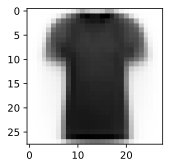

In [13]:
# Plot average t-shirt
d2l.set_figsize()
d2l.plt.imshow(ave_0.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()

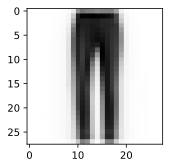

In [14]:
# Plot average trousers
d2l.plt.imshow(ave_1.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()

Tensor.T reverse the dimension.   
If n is the number of dimensions in x, x.T is equivalent to x.permute(n-1, n-2, ..., 0).  
For the following case, the dim of (ave_1 - ave_0) is (1, 28, 28), after T op, the dim of w is (28, 28, 1)

In [44]:
a = torch.rand(2, 3, 4)
a

tensor([[[0.6911, 0.6843, 0.1062, 0.5504],
         [0.8062, 0.0993, 0.5491, 0.3566],
         [0.5187, 0.8549, 0.5408, 0.1741]],

        [[0.3010, 0.8986, 0.7873, 0.0081],
         [0.5467, 0.9169, 0.2011, 0.8948],
         [0.7678, 0.3328, 0.6457, 0.2153]]])

In [45]:
a.T

tensor([[[0.6911, 0.3010],
         [0.8062, 0.5467],
         [0.5187, 0.7678]],

        [[0.6843, 0.8986],
         [0.0993, 0.9169],
         [0.8549, 0.3328]],

        [[0.1062, 0.7873],
         [0.5491, 0.2011],
         [0.5408, 0.6457]],

        [[0.5504, 0.0081],
         [0.3566, 0.8948],
         [0.1741, 0.2153]]])

In [18]:
# Print test set accuracy with eyeballed threshold
w = (ave_1 - ave_0).T

In [19]:
X_test.shape, w.shape

(torch.Size([2000, 1, 28, 28]), torch.Size([28, 28, 1]))

In [46]:
X_test.reshape(2000, -1).shape, w.flatten().shape

(torch.Size([2000, 784]), torch.Size([784]))

In [54]:
X_test.reshape(2000, -1) @ (w.flatten())

tensor([-1350652.0000,  -984603.1875, -1367680.0000,  ...,
        -1105040.2500,  -710158.8750, -1023550.7500])

In [30]:
# '@' is Matrix Multiplication operator in pytorch.
predictions = X_test.reshape(2000, -1) @ (w.flatten()) > -1500000

In [34]:
predictions, y_test, predictions.type(y_test.dtype) == y_test

(tensor([True, True, True,  ..., True, True, True]),
 tensor([1., 1., 1.,  ..., 1., 1., 1.]),
 tensor([True, True, True,  ..., True, True, True]))

In [35]:
# Accuracy
torch.mean((predictions.type(y_test.dtype) == y_test).double(), dtype=torch.float64)

tensor(0.7870, dtype=torch.float64)